# **Data 620 Final Project**
Seung Min Song, Krutika Patel<br>

05/12/2024

## **Presentation**

youtube.com/watch?v=Zoy4dZB_x5U

## **Wine rating analysis using social network analysis and text mining**

## **Abstract**

This study aims to explore the production of different types of wines in various regions, along with the quality assessment and consumer evaluations of wines in those regions. By integrating network analysis and text-mining techniques, we aim to extract key information related to wine production, quality, and consumer perceptions from textual data. Network analysis will help us understand the relationships between these factors and how they influence wine pricing. The findings of this research will provide valuable insights for developing future wine production strategies and enhancing our understanding of the dynamics of the wine market.


## **1. Social network analysis and text mining**

    1.1. Social network analysis
Social network is one of the research fields of web science. It refers to the social relationship structure created by the interdependent relationship between individuals or groups as one entity on the web. All entities are individual entities that exist within the network and can be people, companies, institutions, homepages, etc.

Social network analysis analyzes what influence each entity will have through this social network, what relationship it has with the overall network, and how it is influenced.

Centrality, one of the important measures in 'social network analysis', is a concept that represents the influence between entities in the network and the role of each node, such as which node plays the role of the center and which node plays the role of relay. It is a measure that can identify . In other words, centrality can be measured by how many other entities an entity is connected to, or by how many steps it takes for an entity to reach all other entities. Types of centrality measures include betweenness centrality, which measures the number of nodes connected to a specific node, closeness centrality, which measures how close other nodes are to a specific node, and how much of a relay role certain nodes play for other nodes. There is betweenness centrality, which determines whether something is done.

    1.2. text mining
‘Text mining’ is the process of discovering and extracting useful patterns and relationships from large-scale unstructured text data. This text mining process goes through four stages: (1) ‘data collection’, (2) ‘terminology extraction’, (3) ‘information extraction’ (4) ‘information analysis process’.

## **2. Network Analysis Process**

    2.1. Data Loading & Data Analysis

The analysis data utilized in this study are sourced from one primary dataset: Wine Reviews Data. The Wine Reviews Data obtained from Kaggle (https://www.kaggle.com/datasets/samuelmcguire/wine-reviews-data?resource=download), provides information on wine ratings, prices, review, varietal, appellation and additional attributes. The analysis data is constructed by extracting and distinguishing key attributes such as varietal, appellation, rating, price, and review from the datasets. These attributes serve as the basis for subsequent analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df_wine = pd.read_csv('wine.csv')

    2.2. Network Analysis Process:

In [ ]:
print(df_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323237 entries, 0 to 323236
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   wine         323237 non-null  object
 1   winery       323237 non-null  object
 2   category     323237 non-null  object
 3   designation  229692 non-null  object
 4   varietal     302190 non-null  object
 5   appellation  320630 non-null  object
 6   alcohol      282216 non-null  object
 7   price        299282 non-null  object
 8   rating       323237 non-null  int64 
 9   reviewer     251075 non-null  object
 10  review       322108 non-null  object
dtypes: int64(1), object(10)
memory usage: 27.1+ MB
None


In [ ]:
total_rows = len(df_wine)
print(f"Total rows in df_wine: {total_rows}")

Total rows in df_wine: 323237


    2.2.1. Missing Value:
* Drop any rows with missing value.

In [ ]:
df_wine = df_wine.dropna(subset=['wine', 'winery', 'category', 'designation', 'varietal', 'appellation', 'alcohol', 'price', 'rating', 'reviewer', 'review'])


In [ ]:
total_rows = len(df_wine)
print(f"Total rows in df_wine: {total_rows}")

Total rows in df_wine: 144846


    2.2.2. Drop Charector
* Remove '$' from 'price' column and convert to number
* Dropping rows where 'price' could not be converted to a number (likely non-numeric data was present).

In [ ]:
df_wine['price'] = pd.to_numeric(df_wine['price'].replace('[\$,]', '', regex=True), errors='coerce')

df_wine.dropna(subset=['price'], inplace=True)

print(df_wine.head())

                                                 wine              winery  \
5   Las Positas 2011 Estate Barbera (Livermore Val...         Las Positas   
7   Yvon Mau NV Premius Brut Rosé  (Crémant de Bor...            Yvon Mau   
9   Ata Rangi 2016 Crimson Pinot Noir (Martinborough)           Ata Rangi   
11               Kaiken 2012 Reserva Malbec (Mendoza)              Kaiken   
13   Casa da Passarella 2012 Colheita Tinto Red (Dão)  Casa da Passarella   

     category        designation                    varietal  \
5         Red             Estate                     Barbera   
7   Sparkling  Premius Brut Rosé  Sparkling Blend, Sparkling   
9         Red            Crimson                  Pinot Noir   
11        Red            Reserva                      Malbec   
13        Red     Colheita Tinto              Portuguese Red   

                                        appellation alcohol  price  rating  \
5   Livermore Valley, Central Coast, California, US   15.1%   40.0      89

    2.2.3. Outliers
    
*IQR(Interquartile Range)*:\
    * IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.\
    * Outliers are generally considered to be values ​​greater than Q3 + 1.5IQR or less than Q1 - 1.5IQR.\
    * This method can filter and remove outliers.

In [ ]:
unique_prices = df_wine['price'].unique()
unique_prices.sort()  # Sorting the prices for better readability
#unique_prices

In [ ]:
print(df_wine['price'].describe())

count    141358.000000
mean         38.410169
std          45.245415
min           4.000000
25%          18.000000
50%          28.000000
75%          48.000000
max        8500.000000
Name: price, dtype: float64


In [ ]:
Q1 = df_wine['price'].quantile(0.25)
Q3 = df_wine['price'].quantile(0.75)
IQR = Q3 - Q1

df_wine = df_wine[(df_wine['price'] >= (Q1 - 1.5 * IQR)) & (df_wine['price'] <= (Q3 + 1.5 * IQR))]

print(df_wine.describe())

               price         rating
count  134441.000000  134441.000000
mean       32.594006      88.892897
std        19.148118       2.984285
min         4.000000      80.000000
25%        18.000000      87.000000
50%        27.000000      89.000000
75%        45.000000      91.000000
max        93.000000     100.000000


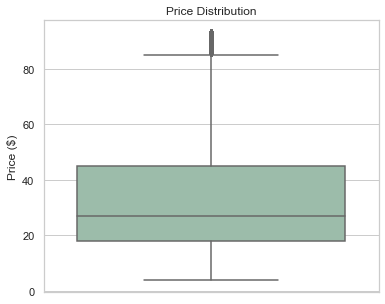

In [ ]:
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))

# Creating the boxplot with the specified color
sns.boxplot(data=df_wine, y='price', color="#97c1a9")

plt.title('Price Distribution')  # Adds a title to the boxplot
plt.ylabel('Price ($)')  # Labels the y-axis
plt.show()  # Displays the plot

    2.2.4. Random Selection

* Since the amount of data is still too large, 2000 are randomly selected.

In [ ]:
df_wine_random = df_wine.sample(n=2000, random_state=42)
df_wine_random

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review
38363,Foundry Vineyards 2017 White on White (Walla W...,Foundry Vineyards,White,White on,Rhône-style White Blend,"Walla Walla Valley (WA), Columbia Valley, Wash...",13.5%,21.0,90,Sean P. Sullivan,Walla Walla Valley white wines remain a rarity...
121449,Cruzat NV Cuvée Réserve Extra Brut (Mendoza),Cruzat,Sparkling,Cuvée Réserve Extra Brut,"Champagne Blend, Sparkling","Mendoza, Mendoza Province, Argentina",12.5%,23.0,86,Michael Schachner,Citrus and stone-fruit aromas struggle to hold...
209673,Steininger 2014 Steinhaus Reserve Riesling (Ka...,Steininger,White,Steinhaus Reserve,Riesling,"Kamptal, Austria",13%,34.0,88,Anne Krebiehl MW,"This is fresh, bright and majoring on slightly..."
308807,Quinta da Ribeirinha 2010 Vale de Lobos Red (T...,Quinta da Ribeirinha,Red,Vale de Lobos,Portuguese Red,"Tejo, Portugal",14%,12.0,89,Roger Voss,"Opulently fruity, it has tarry, firm tannins a..."
241305,Paumanok 1999 Barrel Fermented Chardonnay (Nor...,Paumanok,White,Barrel Fermented,Chardonnay,"North Fork of Long Island, Long Island, New Yo...",13.5%,17.0,85,Joe Czerwinski,"The barrel-fermentation shows in the buttery, ..."
...,...,...,...,...,...,...,...,...,...,...,...
10837,Roar 2016 Rosella's Vineyard Pinot Noir (Santa...,Roar,Red,Rosella's Vineyard,Pinot Noir,"Santa Lucia Highlands, Central Coast, Californ...",14.6%,60.0,92,Matt Kettmann,"Noticeably cloudy in the glass, this single-vi..."
79456,Parras Wines 2015 Castelo do Sulco Colheita Re...,Parras Wines,Red,Castelo do Sulco Colheita,Portuguese Red,"Lisboa, Portugal",13%,7.0,84,Roger Voss,"This soft, easy wine offers attractive light t..."
276054,Bodegas y Viñedos Tábula 2009 Gran Tábula (Ri...,Bodegas y Viñedos Tábula,Red,Gran Tábula,Tempranillo,"Ribera del Duero, Northern Spain, Spain",14%,89.0,92,Michael Schachner,This dark-leaning RDD is a powerful wine with ...
48627,Legaris 2008 Crianza (Ribera del Duero),Legaris,Red,Crianza,"Tinta Fina, Tempranillo","Ribera del Duero, Northern Spain, Spain",13.5%,27.0,86,Michael Schachner,"Dark fruits, leather, compost and burnt aromas..."


* Use regex to leave only the last word of the appellation
* Drop any row with *Buy Now*

In [ ]:
df_wine_random['appellation'] = df_wine_random['appellation'].str.replace(r'.*,\s*', '', regex=True)

# Remove rows where 'appellation' contains 'Buy Now'
df_wine_random = df_wine_random[~df_wine_random['appellation'].str.contains('Buy Now')]

# Display the head of the modified DataFrame to confirm changes
df_wine_random.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review
38363,Foundry Vineyards 2017 White on White (Walla W...,Foundry Vineyards,White,White on,Rhône-style White Blend,US,13.5%,21.0,90,Sean P. Sullivan,Walla Walla Valley white wines remain a rarity...
121449,Cruzat NV Cuvée Réserve Extra Brut (Mendoza),Cruzat,Sparkling,Cuvée Réserve Extra Brut,"Champagne Blend, Sparkling",Argentina,12.5%,23.0,86,Michael Schachner,Citrus and stone-fruit aromas struggle to hold...
209673,Steininger 2014 Steinhaus Reserve Riesling (Ka...,Steininger,White,Steinhaus Reserve,Riesling,Austria,13%,34.0,88,Anne Krebiehl MW,"This is fresh, bright and majoring on slightly..."
308807,Quinta da Ribeirinha 2010 Vale de Lobos Red (T...,Quinta da Ribeirinha,Red,Vale de Lobos,Portuguese Red,Portugal,14%,12.0,89,Roger Voss,"Opulently fruity, it has tarry, firm tannins a..."
241305,Paumanok 1999 Barrel Fermented Chardonnay (Nor...,Paumanok,White,Barrel Fermented,Chardonnay,US,13.5%,17.0,85,Joe Czerwinski,"The barrel-fermentation shows in the buttery, ..."


* Print all unique varietal values

In [ ]:
unique_varietals = df_wine_random['varietal'].unique()
#print(unique_varietals)


* 'In the 'varietal' column, change the two-word varietal including "White" to "White" but excluding the word "Other White". Do the same for 'Red'


In [ ]:
df_wine_random['varietal'] = df_wine_random['varietal'].replace(r'^\b(?!Other\b).*\bWhite\b$', 'White', regex=True)
df_wine_random['varietal'] = df_wine_random['varietal'].replace(r'^\b(?!Other\b).*\bRed\b$', 'Red', regex=True)

#print(df_wine_random['varietal'].unique())

    2.2.5. Net Work Analysis

Create a network that represents what types of wine are produced by region. In this network, regions will be represented as nodes and wine varieties produced in the region will be         
represented as edges. After that, we will color the nodes according to the average rating of the wines produced in each region and analyze which region has the highest rating.

 * *Node*: Create a node representing each region(appellation).
 * *Edges*: Create edges between varieties produced in a given region. In this case, if multiple varietals of wine are produced in a region, those varietals are all connected to the same region node.

The network graph also illustrates that France and Italy are major players in the wine industry, with extensive varieties and connections, indicating a rich diversity of wine offerings. France, in particular, shows a strong presence with multiple varietals linked to its regions, highlighting its reputation as a traditional wine powerhouse.

Additionally, the edge weights in the graph, which represent the frequency of each varietal in the respective regions, suggest that while some regions like Germany and Portugal might have fewer varietals compared to France or Italy, they specialize in specific types of wine, like Riesling in Germany and Port in Portugal, which are both highly rated and culturally significant.

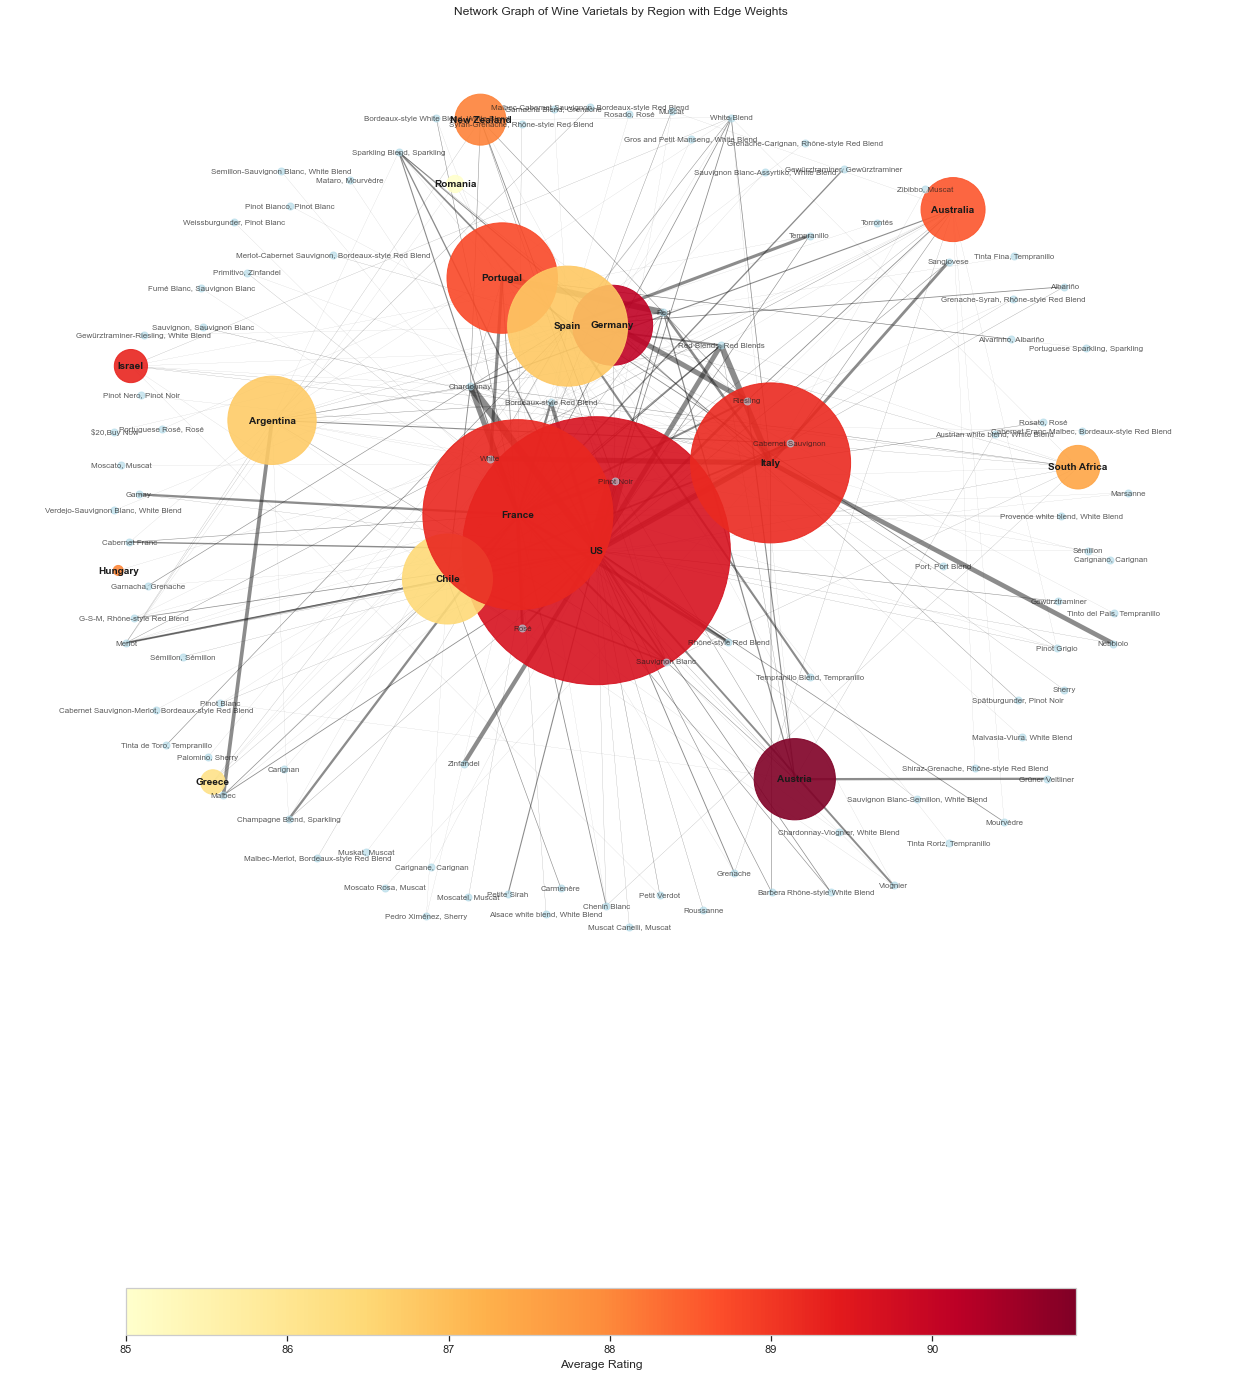

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G_region_varietal = nx.Graph()

# Add nodes for each region with average ratings
for appellation in df_wine_random['appellation'].unique():
    wines_in_region = df_wine_random[df_wine_random['appellation'] == appellation]
    avg_rating = wines_in_region['rating'].mean()
    G_region_varietal.add_node(appellation, rating=avg_rating, count=len(wines_in_region))

# Calculate edge weights (frequency of each varietal per region)
for appellation, varietal in zip(df_wine_random['appellation'], df_wine_random['varietal']):
    if G_region_varietal.has_edge(appellation, varietal):
        G_region_varietal[appellation][varietal]['weight'] += 1
    else:
        G_region_varietal.add_edge(appellation, varietal, weight=1)

# Visualize the graph
plt.figure(figsize=(22, 22))
pos = nx.spring_layout(G_region_varietal, k=2.5)  # Adjust the distance between nodes

# Set node attributes
region_node_sizes = [G_region_varietal.nodes[region]['count'] * 100 for region in G_region_varietal.nodes if G_region_varietal.nodes[region].get('count')]
region_colors = [G_region_varietal.nodes[region]['rating'] for region in G_region_varietal.nodes if G_region_varietal.nodes[region].get('rating')]

# Draw nodes
nx.draw_networkx_nodes(G_region_varietal, pos, nodelist=[n for n in G_region_varietal.nodes if G_region_varietal.nodes[n].get('count')],
                    node_size=region_node_sizes, node_color=region_colors, alpha=0.9, cmap=plt.cm.YlOrRd)
nx.draw_networkx_nodes(G_region_varietal, pos, nodelist=[n for n in G_region_varietal.nodes if not G_region_varietal.nodes[n].get('count')],
                    node_size=50, node_color='lightblue', alpha=0.6)

# Draw edges
edge_weights = [edata['weight'] for _, _, edata in G_region_varietal.edges(data=True)]
nx.draw_networkx_edges(G_region_varietal, pos, width=[w * 0.1 for w in edge_weights], alpha=0.5)

# Add labels
nx.draw_networkx_labels(G_region_varietal, pos, {n: n for n in G_region_varietal.nodes if G_region_varietal.nodes[n].get('count')}, font_size=10, font_weight='bold')
nx.draw_networkx_labels(G_region_varietal, pos, {n: n for n in G_region_varietal.nodes if not G_region_varietal.nodes[n].get('count')}, font_size=8, alpha=0.7)

# Set up color map and legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=min(region_colors), vmax=max(region_colors)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.5, pad=0.02)
cbar.set_label('Average Rating')
cbar.ax.set_position([0.1, 0.05, 0.8, 0.03])

plt.title('Network Graph of Wine Varietals by Region with Edge Weights')
plt.axis('off')
plt.show()

The chart reveals that the US leads with the highest average wine prices, followed closely by Italy, both suggesting that their wines are perceived as premium, possibly due to prestigious appellations and high-quality production standards. Austria and Germany also show relatively high average prices, indicating their strong positioning in the market likely due to the production of specialty wines. In the middle tier, countries like France, Australia, and Israel suggest a mix of premium and moderately priced wines, balancing tradition with a broad market appeal. Towards the lower end of the spectrum, countries such as Romania, Greece, Chile, and Hungary display the lowest average prices, which might be attributed to lower production costs or strategic market positioning that targets more budget-conscious consumers. This indicates a diverse global wine market where some countries like the US and Italy are associated with luxury and others, like Romania and Greece, offer more accessible options.

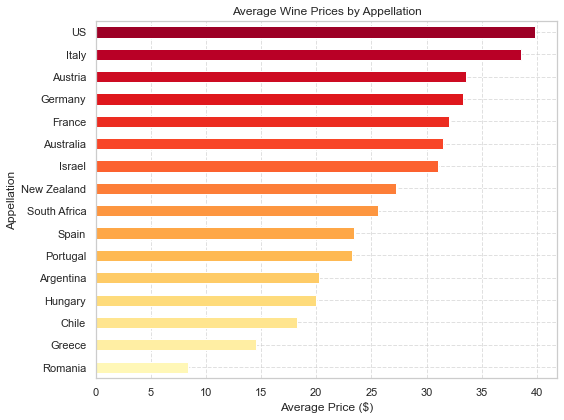

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_wine is your DataFrame and it contains columns 'appellation' and 'price'
# Calculate the average price for each appellation
average_prices = df_wine_random.groupby('appellation')['price'].mean()

# Sort the average prices in ascending order
average_prices = average_prices.sort_values(ascending=True)

# Generate a color palette with a color for each appellation
palette = sns.color_palette("YlOrRd", n_colors=len(average_prices))

plt.figure(figsize=(8, 6))
# Plot the average prices as a horizontal bar chart with the generated palette
average_prices.plot(kind='barh', color=palette)
plt.title('Average Wine Prices by Appellation')
plt.xlabel('Average Price ($)')
plt.ylabel('Appellation')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



Overall, there is a tendency for higher ratings to lead to higher prices, but this relationship is not completly linear or consistent

count    1997.000000
mean       33.352028
std        19.385157
min         7.000000
25%        19.000000
50%        28.000000
75%        45.000000
max        92.000000
Name: price, dtype: float64


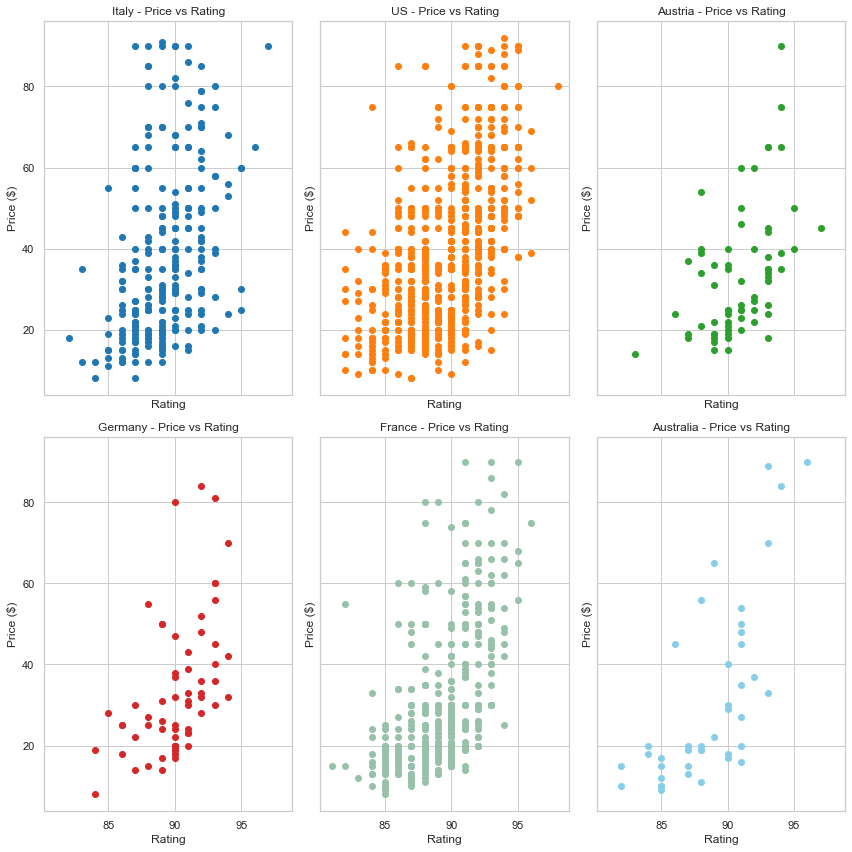

In [ ]:
import matplotlib.pyplot as plt

# Ensure you're using the right dataset
print(df_wine_random['price'].describe())

# Setting up the plot with subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 12), sharex=True, sharey=True)
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728' , '#97C1A9', 'skyblue']
selected_appellations = ['Italy', 'US', 'Austria', 'Germany', 'France', 'Australia']

for ax, appellation, color in zip(axs.ravel(), selected_appellations, colors):
    subset = df_wine_random[df_wine_random['appellation'] == appellation]
    if not subset.empty:
        ax.scatter(subset['rating'], subset['price'], color=color)
        ax.set_title(f"{appellation} - Price vs Rating")
        ax.set_xlabel('Rating')
        ax.set_ylabel('Price ($)')
    else:
        ax.set_title(f"No data available for {appellation}")

plt.tight_layout()
plt.show()

    2.2.6. Island Method

1. France: Bordeaux-style Red Blend: This is a classic choice from France, renowned globally for its quality and complexity. Originating from the Bordeaux region, these blends typically include Merlot and Cabernet Sauvignon, making them very popular and highly marketable.
2. Italy: Sangiovese: As the grape behind Chianti and many other Tuscan wines, Sangiovese embodies the heart of Italian wine tradition. It’s versatile and well-loved, offering good market penetration especially among consumers who appreciate Italian wines.
3. United States: Chardonnay: This is one of the most planted wine grapes in regions like California. Known for its ability to adapt to various climates, Chardonnay from the US is highly popular and offers a broad appeal to different palates.
4. Spain: Tempranillo: This is the backbone of Spain’s most famous red wines, including those from Rioja and Ribera del Duero. Tempranillo is a safe bet for its strong domestic and international reputation.
5. Germany: Riesling: Celebrated for its aromatic qualities and versatility, German Riesling ranges from sweet to dry, catering to a wide audience. It’s a standout choice for representing German viticulture.
6. Argentina: Malbec: Originally from France, Malbec has found its new home in Argentina, particularly in Mendoza. It’s become synonymous with Argentine wine, making it the obvious choice for that market.
7. Austria: Grüner Veltliner: This white grape variety is nearly synonymous with Austrian wine and offers a distinctive profile that can be marketed on its uniqueness and food-friendly nature.
8. Australia: Shiraz: Known as Syrah globally, Shiraz is the most famous and widely planted variety in Australia, especially famous in regions like Barossa Valley for producing robust, flavorful wines.

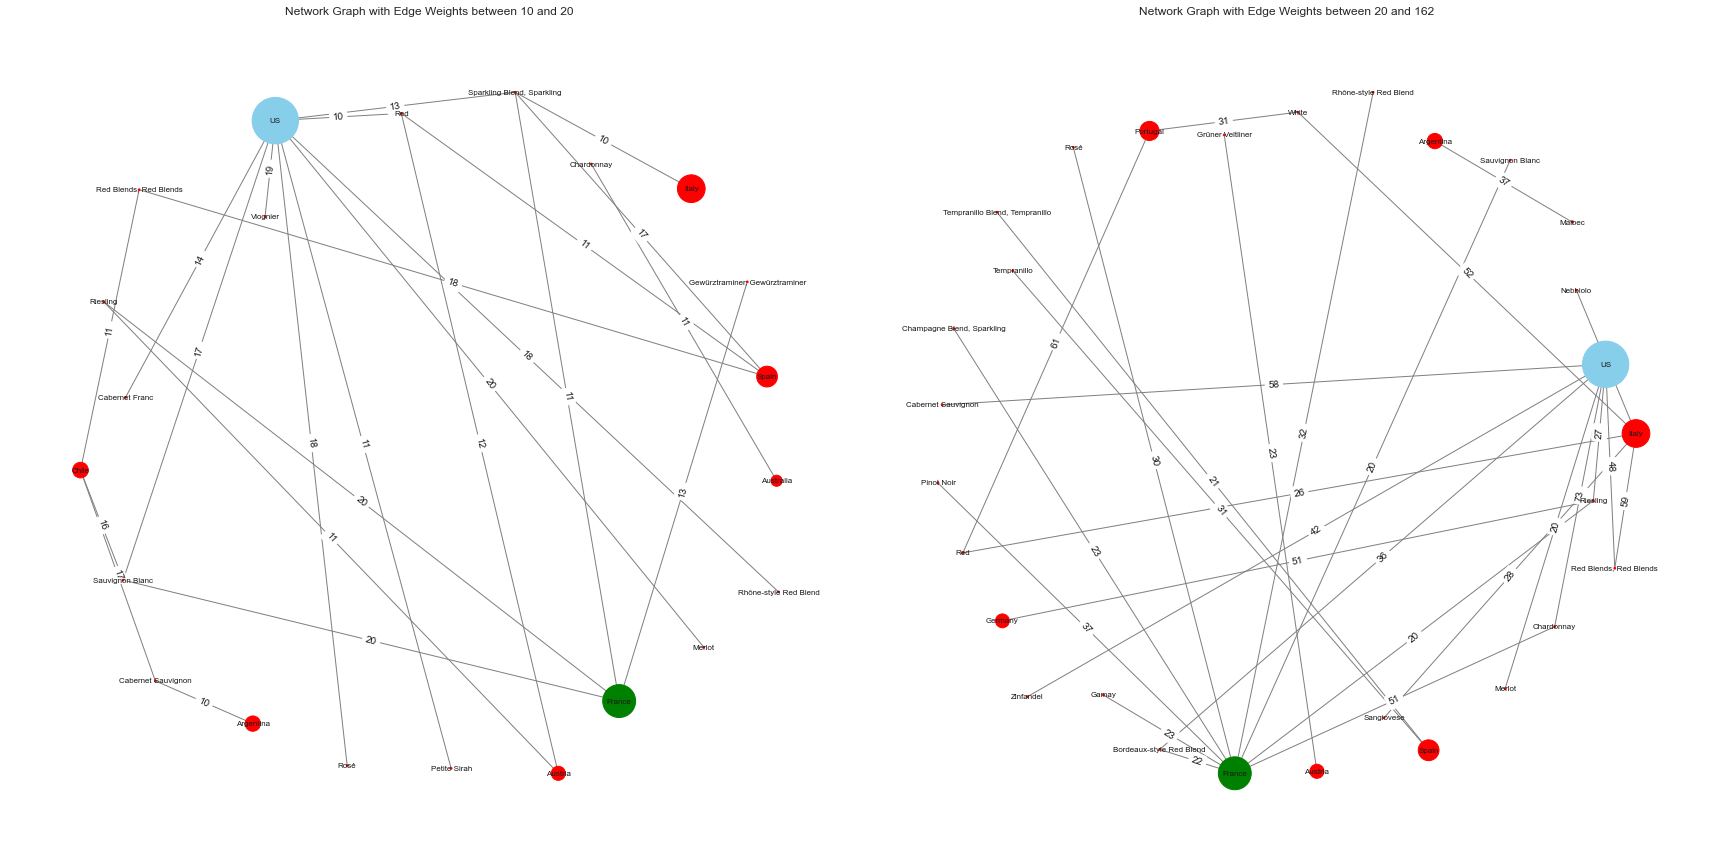

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Setting the edge weight ranges for filtering
thresholds = [(10, 20), (20, 162)]

# Initializing subplots
fig, axs = plt.subplots(1, 2, figsize=(24, 12))  # Increase the size of the graph

# Creating and visualizing graphs for each weight range
for i, (min_weight, max_weight) in enumerate(thresholds):
    G_thresholded = nx.Graph()

    # Adding edges and nodes
    for u, v, weight in G_region_varietal.edges(data=True):
        if min_weight <= weight['weight'] <= max_weight:
            G_thresholded.add_node(u)
            G_thresholded.add_node(v)
            G_thresholded.add_edge(u, v, weight=weight['weight'])

    # Adding 'count' attribute to nodes
    for node in G_thresholded.nodes():
        G_thresholded.nodes[node]['count'] = G_region_varietal.nodes[node].get('count', 1)

    # Setting the layout (increasing the distance between nodes)
    pos = nx.spring_layout(G_thresholded, k=2.5 * (len(G_thresholded.nodes())**0.5), iterations=50)

    # Drawing nodes and edges (reducing node sizes)
    node_sizes = [G_thresholded.nodes[n]['count'] * 3 for n in G_thresholded.nodes()]
    node_colors = ['skyblue' if 'US' in n else 'green' if 'France' in n else 'red' for n in G_thresholded.nodes()]  # Color by country
    nx.draw_networkx_nodes(G_thresholded, pos, ax=axs[i], node_color=node_colors, node_size=node_sizes)
    nx.draw_networkx_edges(G_thresholded, pos, ax=axs[i], edge_color='gray')

    # Adding node and edge labels
    nx.draw_networkx_labels(G_thresholded, pos, ax=axs[i], font_size=8)
    edge_labels = nx.get_edge_attributes(G_thresholded, 'weight')
    nx.draw_networkx_edge_labels(G_thresholded, pos, ax=axs[i], edge_labels=edge_labels)

    # Adding titles
    axs[i].set_title(f'Network Graph with Edge Weights between {min_weight} and {max_weight}')
    axs[i].axis('off')

# Adjusting the overall layout
plt.tight_layout()
plt.show()


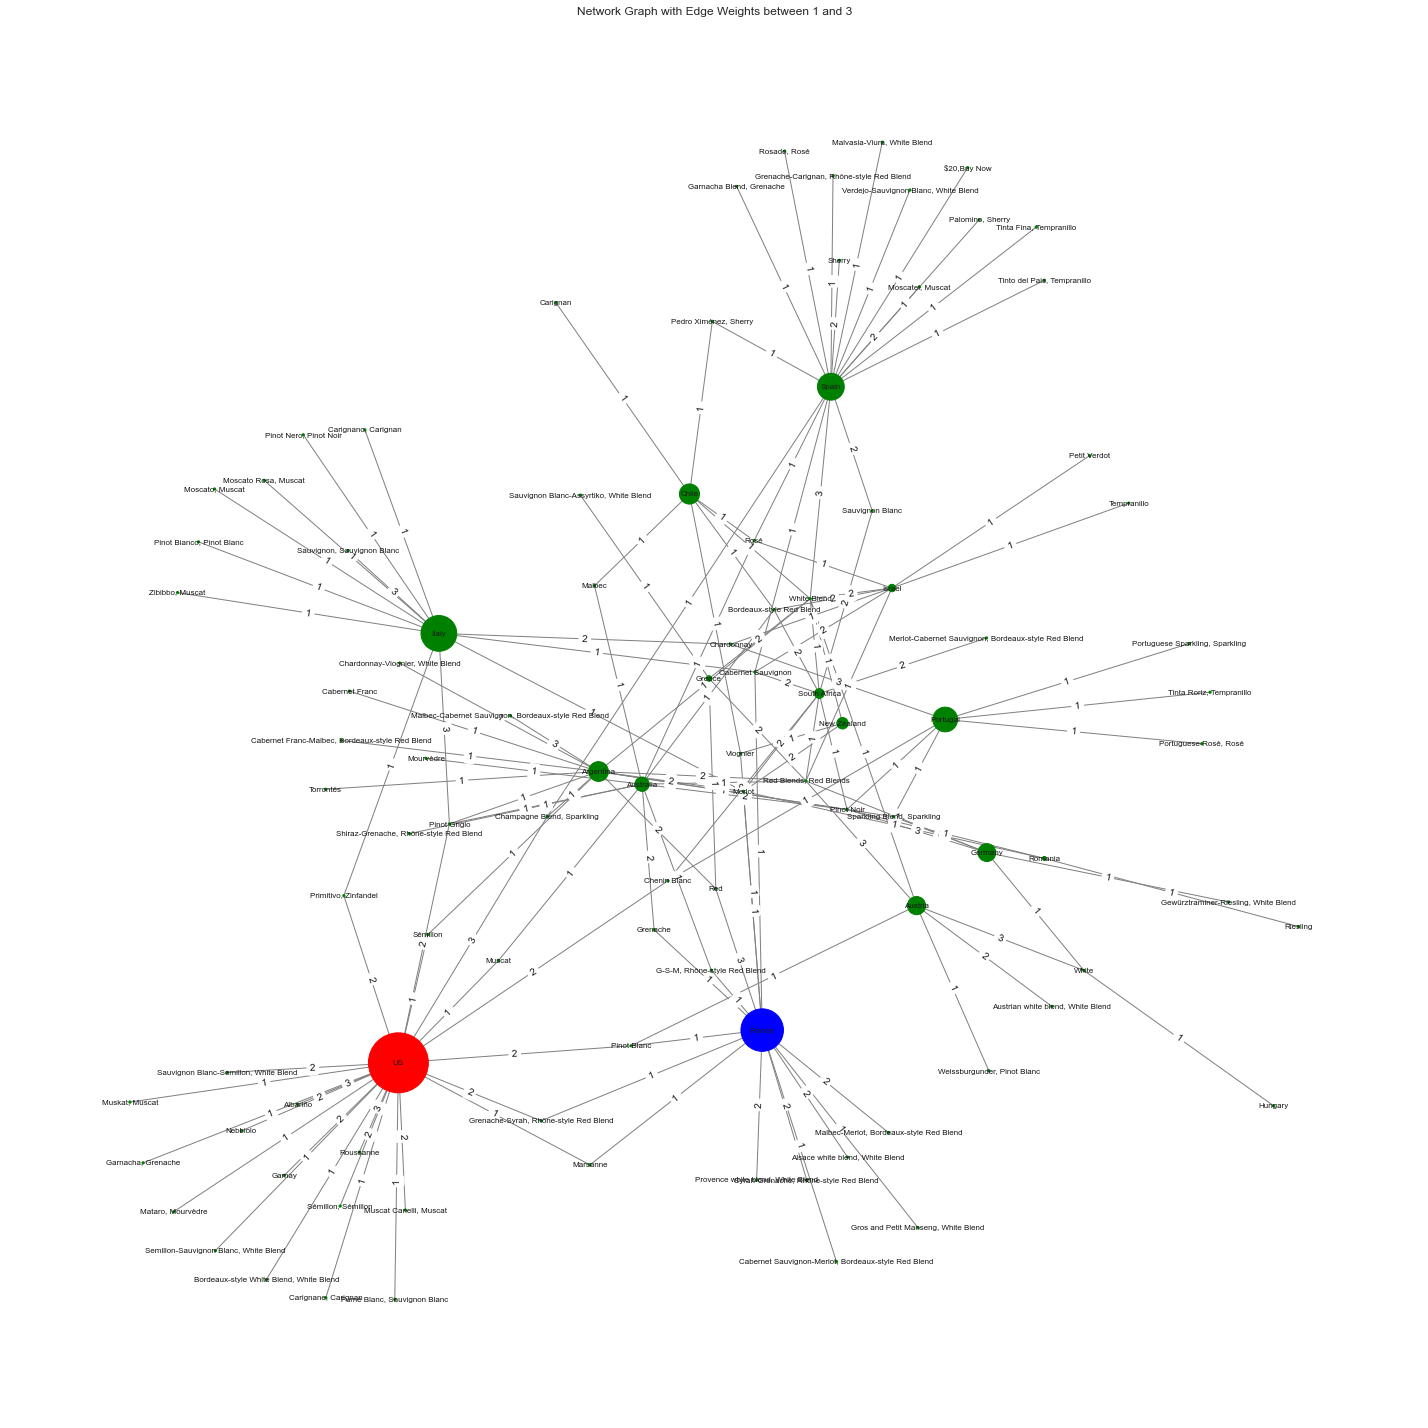

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Setting the edge weight range
min_weight, max_weight = 1, 3

# Creating the graph
G_thresholded = nx.Graph()

# Adding edges and nodes based on the weight criteria
for u, v, weight in G_region_varietal.edges(data=True):
    if min_weight <= weight['weight'] <= max_weight:
        G_thresholded.add_node(u)
        G_thresholded.add_node(v)
        G_thresholded.add_edge(u, v, weight=weight['weight'])

# Adding 'count' attribute to nodes for size scaling
for node in G_thresholded.nodes():
    G_thresholded.nodes[node]['count'] = G_region_varietal.nodes[node].get('count', 1)

# Setting layout to increase node spacing
pos = nx.spring_layout(G_thresholded, k=2.5 / (len(G_thresholded.nodes())**0.5), iterations=100)

# Graph plotting setup
plt.figure(figsize=(20, 20))  # Adjusted single graph size
node_sizes = [G_thresholded.nodes[n]['count'] * 5 for n in G_thresholded.nodes()]
node_colors = ['red' if 'US' in n else 'blue' if 'France' in n else 'green' for n in G_thresholded.nodes()]  # Color nodes by country
nx.draw_networkx_nodes(G_thresholded, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G_thresholded, pos, edge_color='gray')

# Adding node and edge labels
nx.draw_networkx_labels(G_thresholded, pos, font_size=8)
edge_labels = nx.get_edge_attributes(G_thresholded, 'weight')
nx.draw_networkx_edge_labels(G_thresholded, pos, edge_labels=edge_labels)

# Adding a title
plt.title(f'Network Graph with Edge Weights between {min_weight} and {max_weight}')
plt.axis('off')  # Hide axes

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


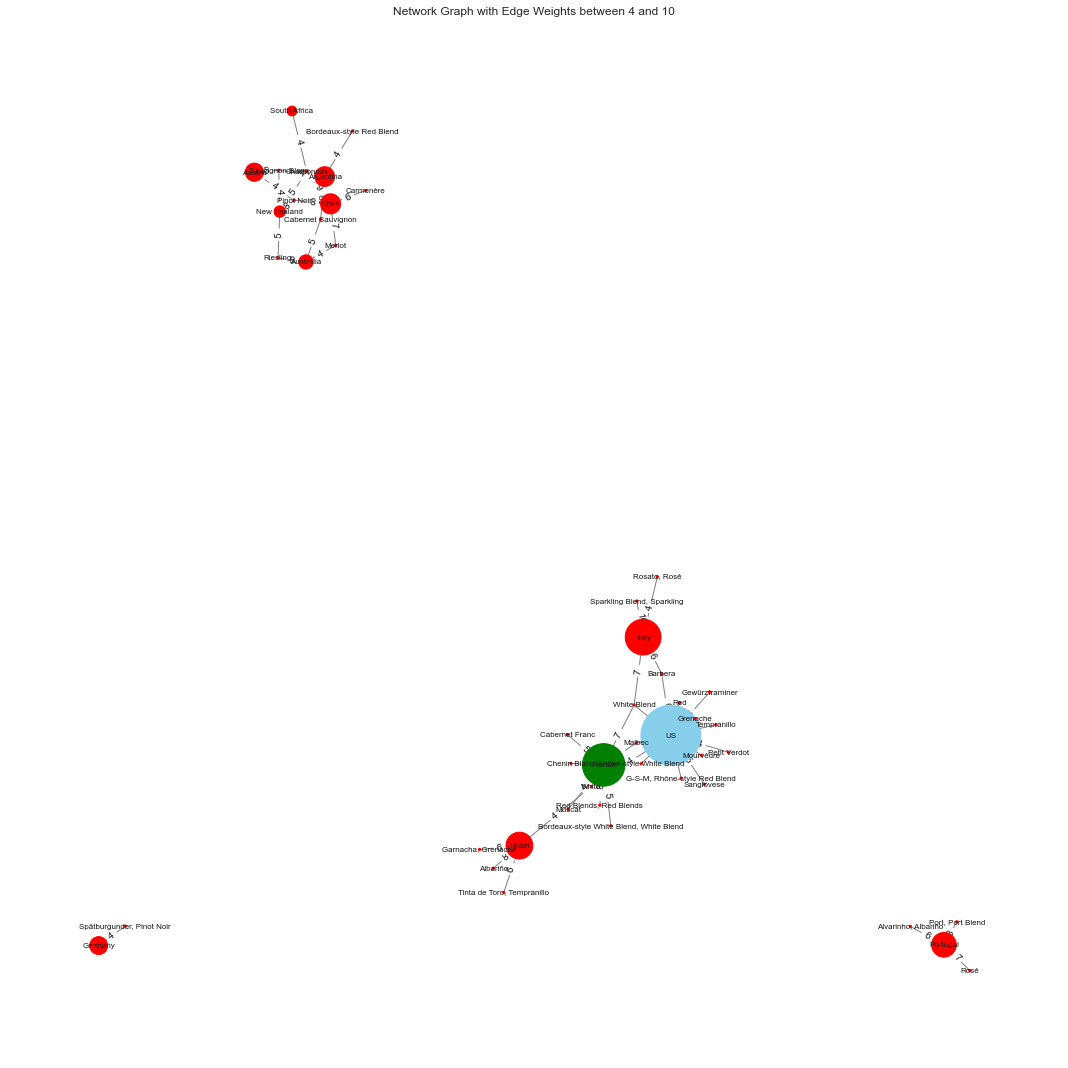

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the edge weight range
min_weight, max_weight = 4, 10

# Create the graph
G_thresholded = nx.Graph()

# Add edges and nodes
for u, v, weight in G_region_varietal.edges(data=True):
    if min_weight <= weight['weight'] <= max_weight:
        G_thresholded.add_node(u)
        G_thresholded.add_node(v)
        G_thresholded.add_edge(u, v, weight=weight['weight'])

# Add the 'count' attribute to nodes
for node in G_thresholded.nodes():
    G_thresholded.nodes[node]['count'] = G_region_varietal.nodes[node].get('count', 1)

# Set the layout (increase the distance between nodes)
pos = nx.spring_layout(G_thresholded, k=2.5 / (len(G_thresholded.nodes())**0.5), iterations=100)

# Graph drawing settings
plt.figure(figsize=(15, 15))  # Adjusted single graph size
node_colors = ['skyblue' if 'US' in n else 'green' if 'France' in n else 'red' for n in G_thresholded.nodes()]  # Color by country
node_sizes = [G_thresholded.nodes[n]['count'] * 5 for n in G_thresholded.nodes()]
nx.draw_networkx_nodes(G_thresholded, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G_thresholded, pos, edge_color='gray')

# Draw node and edge labels
nx.draw_networkx_labels(G_thresholded, pos, font_size=8)
edge_labels = nx.get_edge_attributes(G_thresholded, 'weight')
nx.draw_networkx_edge_labels(G_thresholded, pos, edge_labels=edge_labels)

# Add title
plt.title(f'Network Graph with Edge Weights between {min_weight} and {max_weight}')
plt.axis('off')  # Hide axes

# Adjust layout and display
plt.tight_layout()
plt.show()


    2.2.7. Centrality

$Degree Centrality$
* US has the highest degree centrality of 0.45, suggesting it is directly connected to many other nodes (regions or varietals), indicating a diverse variety of wine interactions.
* Following the US, France, Spain, Italy, and others have varying degrees of connectivity, with France being notably connected, which might indicate its involvement in producing a wide range of varietals or having significant blending interactions with different varietals.

$Between Centrality$
* US also leads in betweenness centrality with a score of 0.40, suggesting it acts as a critical bridge or gateway in the pathways connecting various wine types or regions within the network.
* Spain and France also show significant betweenness centrality, indicating they play crucial roles in connecting various parts of the wine network, possibly serving as central hubs in the trade or exchange of wine varieties.

In [ ]:
#Degree Centrality
deg_cen = nx.degree_centrality(G_region_varietal)
sorted_deg_cen=sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)

top_15_degree = sorted_deg_cen[:15]

print("Top 15 nodes by degree centrality:")
for node, value in top_15_degree:
    print(f"{node}: {value:.2f}")



Top 15 nodes by degree centrality:
US: 0.45
France: 0.31
Spain: 0.23
Italy: 0.18
Argentina: 0.17
Australia: 0.13
Chile: 0.12
Portugal: 0.11
Red Blends, Red Blends: 0.11
Austria: 0.10
Pinot Noir: 0.10
White Blend: 0.10
South Africa: 0.09
Chardonnay: 0.09
Cabernet Sauvignon: 0.08


In [ ]:
# Betweenness Centrality

bet_cen = nx.betweenness_centrality(G_region_varietal)
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x: x[1], reverse=True)

top_15_degree = sorted_bet_cen[:15]

print("Top 15 nodes by between centrality:")
for node, value in top_15_degree:
    print(f"{node}: {value:.2f}")

Top 15 nodes by between centrality:
US: 0.40
Spain: 0.24
France: 0.20
Italy: 0.16
Portugal: 0.09
Argentina: 0.09
Red Blends, Red Blends: 0.08
White: 0.07
White Blend: 0.06
Red: 0.06
Austria: 0.06
Chile: 0.05
Sparkling Blend, Sparkling: 0.05
Pinot Noir: 0.05
Cabernet Sauvignon: 0.04


## **3. Text Analysis Process**

    3.1 Noun Extraction and Analysis


Extract the noun in the first line of “review”.

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

# Reset index if necessary
df_wine_random.reset_index(drop=True, inplace=True)

# Function to preprocess text and extract nouns
def extract_nouns(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # Part-of-speech tagging
    tagged = pos_tag(tokens)
    # Extract nouns
    nouns = [word for word, pos in tagged if pos.startswith('NN')]
    return nouns

# Extract nouns from the first review
nouns = extract_nouns(df_wine_random['review'][0])
print(nouns)


['Walla', 'Walla', 'Valley', 'wines', 'rarity', '%', 'Marsanne', '%', 'Viognier', '%', 'Roussanne', 'case', 'category', 'Vibrant', 'peach', 'apricot', 'papaya', 'mango', 'aromas', 'pure', 'palate', 'finish', 'subtleties']


Apply this to the entire corpus to extract noun.

In [ ]:
corpus = "".join(df_wine_random['review'].tolist())
#corpus

In [ ]:
# Function to preprocess text and extract nouns from a corpus
def extract_nouns_from_corpus(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # Part-of-speech tagging
    tagged = pos_tag(tokens)
    # Extract nouns
    nouns = [word for word, pos in tagged if pos.startswith('NN')]  # NN, NNP, NNS, NNPS
    return nouns

# Extract nouns from the corpus
nouns = extract_nouns_from_corpus(corpus)
print(nouns)

['Walla', 'Walla', 'Valley', 'wines', 'rarity', '%', 'Marsanne', '%', 'Viognier', '%', 'Roussanne', 'case', 'category', 'Vibrant', 'peach', 'apricot', 'papaya', 'mango', 'aromas', 'pure', 'palate', 'finish', 'aromas', 'struggle', 'hold', '%', 'Pinot', 'Noir', '%', 'Chardonnay', 'Flavors', 'apple', 'cider', 'peach', 'juice', 'bread', 'shift', 'table', 'grapes', 'stony', 'lemon', 'notes', 'body', 'Drink', 'fruity', 'tarry', 'firm', 'plum', 'flavors', 'Acidity', 'element', 'wine', 'drink.The', 'barrel-fermentation', 'shows', 'buttery', 'aromas', 'overlay', 'peach', 'fruit', 'Orange', 'flavors', 'spices', 'ripe', 'cherries', 'mineral', 'notes', 'ripe', 'plateau', 'river', 'Douro', 'cool', 'edge', 'plenty', 'acidity', 'time', 'months', 'wood', 'fruitiness', 'Drink', 'now.Broad', 'deep', 'aromatics', 'stewy', 'wine', 'cassis', 'flavors', 'sports', 'sweetness', 'Hope', 'power', 'ripeness', '%', 'Grenache', '%', 'Mourvèdre', '%', 'Syrah', 'balance', 'elegance', 'strength', 'Cuban', 'coffee', '

In [ ]:
from collections import Counter
counter = Counter(nouns)
counter.most_common(50)

[('wine', 912),
 ('flavors', 863),
 ('palate', 667),
 ('fruit', 607),
 ('acidity', 503),
 ('%', 436),
 ('tannins', 360),
 ('cherry', 326),
 ('aromas', 318),
 ('notes', 316),
 ('apple', 244),
 ('spice', 240),
 ('plum', 225),
 ('fruits', 223),
 ('berry', 211),
 ('finish', 178),
 ('texture', 165),
 ('oak', 162),
 ('offers', 156),
 ('ripe', 155),
 ('juicy', 154),
 ('blend', 145),
 ('vanilla', 142),
 ('Cabernet', 133),
 ('citrus', 130),
 ('Drink', 116),
 ('peach', 115),
 ('blackberry', 115),
 ('pepper', 110),
 ('structure', 110),
 ('raspberry', 106),
 ('fruity', 103),
 ('hint', 103),
 ('Sauvignon', 103),
 ('firm', 99),
 ('chocolate', 98),
 ('herb', 96),
 ('character', 95),
 ('Syrah', 94),
 ('orange', 89),
 ('crisp', 86),
 ('spicy', 82),
 ('Merlot', 81),
 ('balance', 80),
 ('bit', 80),
 ('freshness', 79),
 ('nose', 78),
 ('tobacco', 78),
 ('licorice', 77),
 ('hints', 76)]

Remove single word noun

As shown in the results above, two-letter keywords are mostly meaningful words, but one-letter keywords do not seem to have a particularly good effect on the analysis. So let's try removing single word nouns.

In [ ]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)


[('wine', 912),
 ('flavors', 863),
 ('palate', 667),
 ('fruit', 607),
 ('acidity', 503),
 ('tannins', 360),
 ('cherry', 326),
 ('aromas', 318),
 ('notes', 316),
 ('apple', 244)]

$Stopwords$ & $Bag-of-Words (BoW)$

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize stopwords
stop_words = set(stopwords.words('english'))  # Using a set for faster look-up

# Define a function to extract nouns
def extract_nouns(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    tagged = pos_tag(tokens)
    nouns = [word for word, pos in tagged if pos.startswith('NN')]
    return nouns

# Define a text cleaning function that uses the extract_nouns function
def text_cleaning(review):
    nouns = extract_nouns(review)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1 and noun not in stop_words]
    return filtered_nouns
vect = CountVectorizer(tokenizer=text_cleaning)
bow_vect = vect.fit_transform(df_wine_random['review'].tolist())

# Get feature names and count list
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)


In [ ]:
word_list

array(['-and', '-tone', 'ability', ..., 'zoom', 'zweigelt', '—m.s'],
      dtype=object)

In [ ]:
# Total number of times each word appears during all reviews
count_list

array([1, 1, 2, ..., 1, 1, 4], dtype=int64)

In [ ]:
# Number of appearances per review for each word
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
bow_vect.shape

(1997, 3141)

In [ ]:
# "Word" - "Total number of appearances" Matching
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'-and': 1,
 '-tone': 1,
 'ability': 2,
 'abound': 3,
 'abouriou': 1,
 'abrupt': 2,
 'abundance': 2,
 'acacia': 3,
 'accent': 11,
 'accents': 32,
 'accentuate': 1,
 'accompanies': 7,
 'accompaniment': 1,
 'accompany': 2,
 'accomplishment': 1,
 'achieves': 1,
 'acid': 13,
 'acidic': 3,
 'acidity': 555,
 'acids': 18,
 'acres': 1,
 'acts': 1,
 'add': 7,
 'addition': 7,
 'adornment': 1,
 'aeration': 5,
 'affords': 1,
 'aftertaste': 32,
 'age': 75,
 'ager': 1,
 'ages': 2,
 'aging': 12,
 'aglianico': 4,
 'aid': 1,
 'air': 7,
 'airing': 1,
 'airs': 1,
 'airy': 2,
 'al': 1,
 'albariño': 6,
 'alcohol': 28,
 'alea': 1,
 'alella': 1,
 'alentejo': 3,
 'alert': 1,
 'alfresco': 1,
 'alfrocheiro': 1,
 'alicante': 5,
 'aligoté': 1,
 'alliance': 1,
 'allspice': 1,
 'allure': 1,
 'almond': 29,
 'almonds': 3,
 'alongside': 14,
 'alorna': 1,
 'alpine': 1,
 'altamira': 1,
 'alto': 1,
 'alvarinho': 4,
 'alvaro': 1,
 'amador': 2,
 'amidst': 2,
 'amount': 9,
 'amounts': 6,
 'amphorae': 1,
 'amphoras': 1,
 'am

$TF-IDF$

* TF-IDF conversion is performed on the Bag of Words vector.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Word importance (TF-IDF value) in the first review -- print only non-zero
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

print(tf_idf_vect[0])

  (0, 3081)	0.17936754241264197
  (0, 3020)	0.5242292811012871
  (0, 2944)	0.2018610364642377
  (0, 2706)	0.28730093209903645
  (0, 2358)	0.2288201741467988
  (0, 2227)	0.26211464055064354
  (0, 2196)	0.194100578500682
  (0, 1959)	0.14007471543272124
  (0, 1935)	0.2417803641006707
  (0, 1927)	0.07609215679177446
  (0, 1642)	0.26211464055064354
  (0, 1621)	0.22535697030870158
  (0, 1048)	0.10026086287155477
  (0, 460)	0.28730093209903645
  (0, 453)	0.25400646569519175
  (0, 108)	0.09881136603839612
  (0, 96)	0.2018610364642377


$“Vector” - “word” mapping$

In [ ]:
vect.vocabulary_

{'walla': 3020,
 'valley': 2944,
 'wines': 3081,
 'rarity': 2227,
 'marsanne': 1642,
 'roussanne': 2358,
 'case': 453,
 'category': 460,
 'peach': 1959,
 'apricot': 96,
 'papaya': 1935,
 'mango': 1621,
 'aromas': 108,
 'pure': 2196,
 'palate': 1927,
 'finish': 1048,
 'subtleties': 2706,
 'citrus': 550,
 'stone-fruit': 2669,
 'struggle': 2695,
 'hold': 1339,
 'pinot': 2037,
 'chardonnay': 494,
 'flavors': 1067,
 'apple': 91,
 'cider': 540,
 'juice': 1438,
 'bread': 325,
 'shift': 2488,
 'table': 2762,
 'grapes': 1228,
 'stony': 2673,
 'lemon': 1515,
 'notes': 1834,
 'body': 281,
 'refreshment': 2258,
 'fruity': 1148,
 'tarry': 2783,
 'firm': 1053,
 'plum': 2071,
 'acidity': 18,
 'wine': 3075,
 'drink': 870,
 'barrel-fermentation': 179,
 'shows': 2501,
 'buttery': 397,
 'overlay': 1906,
 'fruit': 1143,
 'orange': 1886,
 'spices': 2611,
 'ripe': 2312,
 'cherries': 511,
 'mineral': 1718,
 'plateau': 2059,
 'river': 2323,
 'douro': 862,
 'cool': 665,
 'edge': 907,
 'plenty': 2068,
 'time': 

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{3020: 'walla', 2944: 'valley', 3081: 'wines', 2227: 'rarity', 1642: 'marsanne', 2358: 'roussanne', ...


    3.2 Sentiment Analysis

&Logistic Regression

In [ ]:
selected_columns = df_wine_random[['rating', 'review']]  # Select only the 'rating' and 'review' columns

# Display the selected columns
print(selected_columns)

      rating                                             review
0         90  Walla Walla Valley white wines remain a rarity...
1         86  Citrus and stone-fruit aromas struggle to hold...
2         88  This is fresh, bright and majoring on slightly...
3         89  Opulently fruity, it has tarry, firm tannins a...
4         85  The barrel-fermentation shows in the buttery, ...
...      ...                                                ...
1992      92  Noticeably cloudy in the glass, this single-vi...
1993      84  This soft, easy wine offers attractive light t...
1994      92  This dark-leaning RDD is a powerful wine with ...
1995      86  Dark fruits, leather, compost and burnt aromas...
1996      91  This wine gets a special label but no vineyard...

[1997 rows x 2 columns]


<AxesSubplot:>

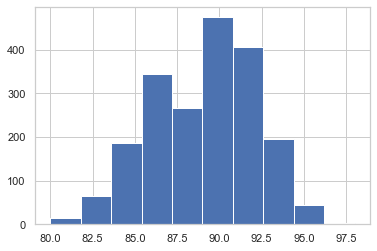

In [ ]:
df_wine_random['rating'].hist()

In [ ]:
def rating_to_label(rating):
    if rating >= 90:
        return 1
    else:
        return 0

df_wine_random['y'] = df_wine_random['rating'].apply(lambda x: rating_to_label(x))
df_wine_random.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,y
0,Foundry Vineyards 2017 White on White (Walla W...,Foundry Vineyards,White,White on,Rhône-style White Blend,US,13.5%,21.0,90,Sean P. Sullivan,Walla Walla Valley white wines remain a rarity...,1
1,Cruzat NV Cuvée Réserve Extra Brut (Mendoza),Cruzat,Sparkling,Cuvée Réserve Extra Brut,"Champagne Blend, Sparkling",Argentina,12.5%,23.0,86,Michael Schachner,Citrus and stone-fruit aromas struggle to hold...,0
2,Steininger 2014 Steinhaus Reserve Riesling (Ka...,Steininger,White,Steinhaus Reserve,Riesling,Austria,13%,34.0,88,Anne Krebiehl MW,"This is fresh, bright and majoring on slightly...",0
3,Quinta da Ribeirinha 2010 Vale de Lobos Red (T...,Quinta da Ribeirinha,Red,Vale de Lobos,Red,Portugal,14%,12.0,89,Roger Voss,"Opulently fruity, it has tarry, firm tannins a...",0
4,Paumanok 1999 Barrel Fermented Chardonnay (Nor...,Paumanok,White,Barrel Fermented,Chardonnay,US,13.5%,17.0,85,Joe Czerwinski,"The barrel-fermentation shows in the buttery, ...",0


$Training set / Test set$

In [ ]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df_wine_random['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((600, 3141), (600,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


In [ ]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.67
precision: 0.64
recall: 0.59
F1: 0.61


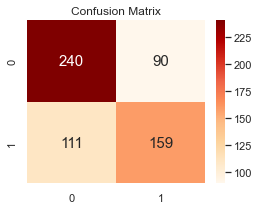

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
lr.coef_



array([[ 0.24844386, -0.20261663,  0.32063783, ...,  0.14101353,
         0.        , -0.16749185]])

In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])


[(1.7288549573313965, 2991), (1.6970383407702725, 2297), (1.4146316758624897, 28), (1.383316138881716, 3112), (1.3419061929808604, 2611)]
[(-1.3536582162101976, 488), (-1.367144396292149, 1148), (-1.4558298080983947, 1021), (-1.5747538748990757, 235), (-1.688830561071869, 870)]


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index


[(1.7288549573313965, 2991),
 (1.6970383407702725, 2297),
 (1.4146316758624897, 28),
 (1.383316138881716, 3112),
 (1.3419061929808604, 2611),
 (1.2473170170419643, 2668),
 (1.2378597924532162, 1053),
 (1.2313528689910078, 2154),
 (1.2083936632552974, 1719),
 (1.1573046681945367, 2821),
 (1.1123058935422503, 2990),
 (1.1091660340193727, 919),
 (1.0742320593748629, 2610),
 (1.0630901971963793, 2531),
 (1.0341696205044448, 728),
 (1.0330038155401147, 312),
 (1.0249993831146136, 2998),
 (1.0081844848439578, 2769),
 (0.997223707355379, 2796),
 (0.9726717938049031, 498),
 (0.9578661135571078, 2613),
 (0.9405608192300351, 2197),
 (0.9021811327456438, 802),
 (0.9001909698676597, 2415),
 (0.8792106339695601, 897),
 (0.8338791099406532, 2962),
 (0.8308614640275328, 1456),
 (0.8230851079871443, 2087),
 (0.8071988012102815, 758),
 (0.8051290244317403, 1082),
 (0.7808694331918711, 2106),
 (0.7798340589259267, 2161),
 (0.7768717800499043, 1400),
 (0.7701715617004382, 626),
 (0.7693147973350858, 2527

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{3020: 'walla',
 2944: 'valley',
 3081: 'wines',
 2227: 'rarity',
 1642: 'marsanne',
 2358: 'roussanne',
 453: 'case',
 460: 'category',
 1959: 'peach',
 96: 'apricot',
 1935: 'papaya',
 1621: 'mango',
 108: 'aromas',
 2196: 'pure',
 1927: 'palate',
 1048: 'finish',
 2706: 'subtleties',
 550: 'citrus',
 2669: 'stone-fruit',
 2695: 'struggle',
 1339: 'hold',
 2037: 'pinot',
 494: 'chardonnay',
 1067: 'flavors',
 91: 'apple',
 540: 'cider',
 1438: 'juice',
 325: 'bread',
 2488: 'shift',
 2762: 'table',
 1228: 'grapes',
 2673: 'stony',
 1515: 'lemon',
 1834: 'notes',
 281: 'body',
 2258: 'refreshment',
 1148: 'fruity',
 2783: 'tarry',
 1053: 'firm',
 2071: 'plum',
 18: 'acidity',
 3075: 'wine',
 870: 'drink',
 179: 'barrel-fermentation',
 2501: 'shows',
 397: 'buttery',
 1906: 'overlay',
 1143: 'fruit',
 1886: 'orange',
 2611: 'spices',
 2312: 'ripe',
 511: 'cherries',
 1718: 'mineral',
 2059: 'plateau',
 2323: 'river',
 862: 'douro',
 665: 'cool',
 907: 'edge',
 2068: 'plenty',
 2841: 't

In [ ]:
for coef in coef_pos_index[:40]:
    print(invert_index_vectorizer[coef[1]], coef[0])

vineyard 1.7288549573313965
richness 1.6970383407702725
age 1.4146316758624897
years 1.383316138881716
spices 1.3419061929808604
stone 1.2473170170419643
firm 1.2378597924532162
producer 1.2313528689910078
minerality 1.2083936632552974
texture 1.1573046681945367
vines 1.1123058935422503
elegance 1.1091660340193727
spice 1.0742320593748629
site 1.0630901971963793
currants 1.0341696205044448
boysenberry 1.0330038155401147
violet 1.0249993831146136
tangerine 1.0081844848439578
tea 0.997223707355379
charm 0.9726717938049031
spicy 0.9578661135571078
purity 0.9405608192300351
dense 0.9021811327456438
savory 0.9001909698676597
earth 0.8792106339695601
velvety 0.8338791099406532
keeps 0.8308614640275328
pomegranate 0.8230851079871443
dark 0.8071988012102815
floor 0.8051290244317403
potential 0.7808694331918711
promise 0.7798340589259267
intensity 0.7768717800499043
complexity 0.7701715617004382
sip 0.7693147973350858
graphite 0.7518976214953873
layers 0.749692441489666
valley 0.748185522221707

In [ ]:
for coef in coef_neg_index[:40]:
    print(invert_index_vectorizer[coef[1]], coef[0])


drink -1.688830561071869
bit -1.5747538748990757
feels -1.4558298080983947
fruity -1.367144396292149
character -1.3536582162101976
flavors -1.3315900954086752
raisin -1.2208437496735844
fruit -1.131856723194364
light -1.006228164944423
finish -0.9879044211829847
carry -0.9599048730450038
mouth -0.9035605015158427
sweet -0.8929779054453237
straightforward -0.8243850620160975
bright -0.7967559600823102
acidity -0.7779435782544044
merlot -0.7683213262777185
astringent -0.7639086270281443
offers -0.7601727497715655
rubbery -0.7553970276161062
herbal -0.7362131314966811
end -0.7097293356173014
buttery -0.7053734515115156
berry -0.6966529032880383
chunky -0.6945594356975775
stalky -0.6782028395034696
verdot -0.656814739970429
bouquet -0.6562887463136515
pinot -0.649434065117004
rubber -0.6478650512144923
soil -0.6449257344555438
grabby -0.6311464581391105
berries -0.6299135526980354
tongue -0.6288265475648943
feel -0.6169877442120754
sauvignon -0.6066391167785109
tastes -0.6027001506938
lot 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df_wine_random['review'] exists and contains text data.
reviews = df_wine_random['review'].dropna()  # Ensure there are no NaN values in the text data

# Initialize CountVectorizer to use English stop words and limit to 50 features (words)
vectorizer = CountVectorizer(max_features=100, stop_words='english')

# Fit the model to the data and transform the text to a DTM (Document-Term Matrix)
X = vectorizer.fit_transform(reviews)

# Convert the sparse matrix to a dense matrix
dtm_dense = X.todense()

# Get the feature names to see which words are included in the top 50
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to view the DTM more easily if needed
dtm_df = pd.DataFrame(dtm_dense, columns=feature_names)

print("Feature names (top 100 most common words):")
print(feature_names)
#print("\nDocument-Term Matrix (dense format):")
#print(dtm_df.head())


Feature names (top 100 most common words):
['acidity' 'alongside' 'apple' 'aromas' 'balance' 'balanced' 'berry' 'bit'
 'black' 'blackberry' 'blend' 'bodied' 'bottling' 'bright' 'cabernet'
 'character' 'cherry' 'chocolate' 'citrus' 'clove' 'concentrated' 'creamy'
 'crisp' 'dark' 'dried' 'drink' 'dry' 'earthy' 'fine' 'finish' 'firm'
 'flavors' 'fresh' 'freshness' 'fruit' 'fruits' 'fruity' 'good' 'green'
 'herb' 'herbal' 'herbs' 'hint' 'hints' 'juicy' 'just' 'lead' 'leather'
 'lemon' 'licorice' 'light' 'like' 'lime' 'long' 'medium' 'merlot'
 'mineral' 'nose' 'notes' 'oak' 'offers' 'opens' 'orange' 'palate' 'peach'
 'pear' 'pepper' 'plum' 'raspberry' 'ready' 'red' 'rich' 'richness' 'ripe'
 'sauvignon' 'savory' 'shows' 'smooth' 'soft' 'spice' 'spicy' 'strawberry'
 'structure' 'structured' 'style' 'sweet' 'syrah' 'tangy' 'tannic'
 'tannins' 'tart' 'texture' 'tobacco' 'touch' 'vanilla' 'vineyard' 'white'
 'wine' 'wood' 'yellow']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer initialization
vectorizer = CountVectorizer(max_features=100, stop_words='english')

# Fitting the vectorizer to the 'review' column and transforming the data
dtm = vectorizer.fit_transform(df_wine_random['review'])

# Converting the document-term matrix to dense format
dtm_dense = dtm.todense()

# Printing the dense matrix
print(dtm_dense)

# Outputting the shape of the matrix
print(dtm_dense.shape)




[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 0]]
(1997, 100)


In [ ]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(dtm_dense, rowvar=False)

# Convert the correlation matrix into a DataFrame for better readability
correlation_df = pd.DataFrame(correlation_matrix, index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# Output the DataFrame
print(correlation_df)

            acidity  alongside     apple    aromas   balance  balanced  \
acidity    1.000000   0.007787  0.074581 -0.060799  0.039041  0.098152   
alongside  0.007787   1.000000 -0.026080  0.221159 -0.049454  0.001036   
apple      0.074581  -0.026080  1.000000  0.019812  0.031611  0.021268   
aromas    -0.060799   0.221159  0.019812  1.000000 -0.027496 -0.065433   
balance    0.039041  -0.049454  0.031611 -0.027496  1.000000 -0.026195   
...             ...        ...       ...       ...       ...       ...   
vineyard  -0.030430  -0.065770 -0.026783 -0.073782  0.003212  0.017552   
white      0.084807   0.007383  0.070632  0.052849 -0.028288  0.008953   
wine       0.154468  -0.166972 -0.049144 -0.356414  0.005940  0.105454   
wood       0.010064  -0.035866 -0.041406 -0.075466  0.018091  0.000402   
yellow     0.143808   0.047662  0.169704  0.061631 -0.021923  0.040480   

              berry       bit     black  blackberry  ...      tart   texture  \
acidity    0.011063 -0.057929 -

In [ ]:
# Extract the feature names from the vectorizer
words = vectorizer.get_feature_names_out()

# Create a list of edges between words with their correlation values
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):  # Only take upper triangular to avoid duplicates and self-correlations
        edges.append((words[i], words[j], correlation_matrix[i, j]))

# Convert the list of edges to a DataFrame
edges_df = pd.DataFrame(edges, columns=['Word1', 'Word2', 'Correlation'])

# Display the DataFrame containing the edges
print(edges_df.head(15))

      Word1       Word2  Correlation
0   acidity   alongside     0.007787
1   acidity       apple     0.074581
2   acidity      aromas    -0.060799
3   acidity     balance     0.039041
4   acidity    balanced     0.098152
5   acidity       berry     0.011063
6   acidity         bit    -0.057929
7   acidity       black    -0.091035
8   acidity  blackberry    -0.091572
9   acidity       blend    -0.041079
10  acidity      bodied    -0.027601
11  acidity    bottling    -0.021551
12  acidity      bright     0.156458
13  acidity    cabernet    -0.087420
14  acidity   character     0.054228


In [ ]:
# Calculate the Term-Term Matrix (TTM)
ttm = np.dot(dtm_dense.T, dtm_dense)

# Displaying the shape of the TTM
print(ttm.shape)

# Converting TTM to a DataFrame for better readability
ttm_df = pd.DataFrame(ttm, index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# Display the TTM DataFrame
print(ttm_df)

(100, 100)
           acidity  alongside  apple  aromas  balance  balanced  berry  bit  \
acidity        599         40    103     181       35        66     83   20   
alongside       40        134     13     104        1        10     38    4   
apple          103         13    328     106       18        24      2   21   
aromas         181        104    106     760       29        37    185   40   
balance         35          1     18      29       99         4      9    6   
...            ...        ...    ...     ...      ...       ...    ...  ...   
vineyard        27          0     11      26        6        11      9    4   
white          101         18     54     111        7        20     12   10   
wine           455         20    136     187       60       131    105   52   
wood            33          3      7      22        7         8     16    2   
yellow          54         11     40      45        2        11      0    3   

           black  blackberry  ...  tart 

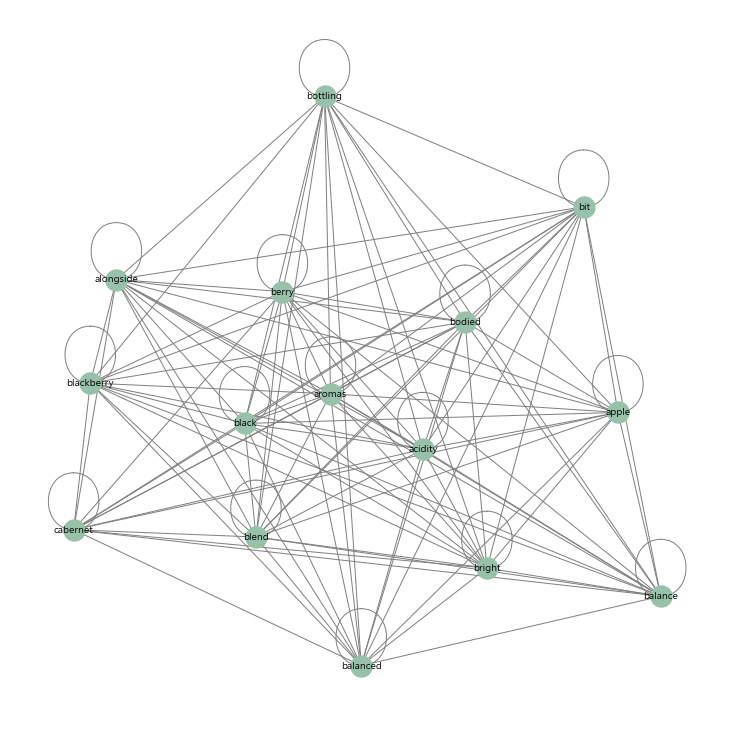

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'dtm_dense' and 'vectorizer' are properly defined
words = vectorizer.get_feature_names_out()  # Get the words corresponding to columns in the DTM
ttm = np.dot(dtm_dense.T, dtm_dense)  # Calculate the TTM from DTM

plt.figure(figsize=(10, 10))
# Create a graph from the numpy array of the TTM, focusing on top 15 terms
G = nx.from_numpy_array(ttm[:15, :15])  # Use from_numpy_array instead

# Map the numerical nodes to the actual word names
mapping = {i: word for i, word in enumerate(words[:15])}
G = nx.relabel_nodes(G, mapping)

# Set the font for node labels
font_path = 'C:/Windows/Fonts/malgun.ttf'
prop = matplotlib.font_manager.FontProperties(fname=font_path)
plt.rc('font', family=prop.get_name())

# Draw the graph
pos = nx.spring_layout(G)  # Get positions for the nodes in G

# Customizing node and edge visual properties to remove black circle outlines
nx.draw(G, pos, with_labels=True, font_family=prop.get_name(), node_color='#97c1a9',
        edge_color='grey', node_size=500, font_size=10, font_color='black',
        node_shape='o', linewidths=0)  # Set linewidths to 0 to remove outlines

# Show the plot
plt.show()


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentimentAnalyser = SentimentIntensityAnalyzer()

In [ ]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

df_wine_random['score'] = df_wine_random['review'].apply(lambda x: calculate_sentiment(x))
df_wine_random.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,y,score
0,Foundry Vineyards 2017 White on White (Walla W...,Foundry Vineyards,White,White on,Rhône-style White Blend,US,13.5%,21.0,90,Sean P. Sullivan,Walla Walla Valley white wines remain a rarity...,1,0.9398
1,Cruzat NV Cuvée Réserve Extra Brut (Mendoza),Cruzat,Sparkling,Cuvée Réserve Extra Brut,"Champagne Blend, Sparkling",Argentina,12.5%,23.0,86,Michael Schachner,Citrus and stone-fruit aromas struggle to hold...,0,-0.0900
2,Steininger 2014 Steinhaus Reserve Riesling (Ka...,Steininger,White,Steinhaus Reserve,Riesling,Austria,13%,34.0,88,Anne Krebiehl MW,"This is fresh, bright and majoring on slightly...",0,0.6369
3,Quinta da Ribeirinha 2010 Vale de Lobos Red (T...,Quinta da Ribeirinha,Red,Vale de Lobos,Red,Portugal,14%,12.0,89,Roger Voss,"Opulently fruity, it has tarry, firm tannins a...",0,0.8338
4,Paumanok 1999 Barrel Fermented Chardonnay (Nor...,Paumanok,White,Barrel Fermented,Chardonnay,US,13.5%,17.0,85,Joe Czerwinski,"The barrel-fermentation shows in the buttery, ...",0,0.0000


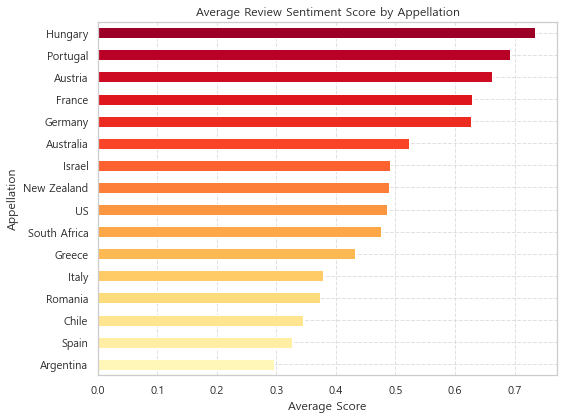

In [ ]:
# Calculate the average sentiment score for each appellation
average_score = df_wine_random.groupby('appellation')['score'].mean()

# Sort the average scores in ascending order
average_score = average_score.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
# Plot the average scores as a horizontal bar chart with the generated palette
average_score.plot(kind='barh', color=palette)
plt.title('Average Review Sentiment Score by Appellation')
plt.xlabel('Average Score')
plt.ylabel('Appellation')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

    3.3 Emotion Detection

Wine tasting has shown to elicit emotions in the consumer. Different types of wines have been associated with different types of emotions. In terms of relationships between emotions and specific wine styles, white wine has been found to have characteristics often associated with more positive emotions, while aged wine characteristics are associated more often with negative emotions. By looking at the emotions detected in the reviews of wines, we can better understand how to target the product to consumers.

In [ ]:
# Import module
from nrclex import NRCLex

In [ ]:
def get_emotions(text):
     # Create object
    emotion = NRCLex(text)
    return emotion.raw_emotion_scores

df_wine_random['raw_emotion'] = df_wine_random['review'].apply(lambda x: get_emotions(x))

In [ ]:
df_wine_random.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,y,score,raw_emotion
0,Foundry Vineyards 2017 White on White (Walla W...,Foundry Vineyards,White,White on,Rhône-style White Blend,US,13.5%,21.0,90,Sean P. Sullivan,Walla Walla Valley white wines remain a rarity...,1,0.9398,"{'anticipation': 1, 'joy': 1, 'positive': 2, '..."
1,Cruzat NV Cuvée Réserve Extra Brut (Mendoza),Cruzat,Sparkling,Cuvée Réserve Extra Brut,"Champagne Blend, Sparkling",Argentina,12.5%,23.0,86,Michael Schachner,Citrus and stone-fruit aromas struggle to hold...,0,-0.0900,"{'anger': 1, 'fear': 1, 'negative': 1, 'sadnes..."
2,Steininger 2014 Steinhaus Reserve Riesling (Ka...,Steininger,White,Steinhaus Reserve,Riesling,Austria,13%,34.0,88,Anne Krebiehl MW,"This is fresh, bright and majoring on slightly...",0,0.6369,"{'disgust': 1, 'negative': 1, 'positive': 2, '..."
3,Quinta da Ribeirinha 2010 Vale de Lobos Red (T...,Quinta da Ribeirinha,Red,Vale de Lobos,Red,Portugal,14%,12.0,89,Roger Voss,"Opulently fruity, it has tarry, firm tannins a...",0,0.8338,"{'negative': 2, 'positive': 2, 'sadness': 1, '..."
4,Paumanok 1999 Barrel Fermented Chardonnay (Nor...,Paumanok,White,Barrel Fermented,Chardonnay,US,13.5%,17.0,85,Joe Czerwinski,"The barrel-fermentation shows in the buttery, ...",0,0.0000,"{'positive': 1, 'disgust': 1, 'negative': 1}"


In [ ]:
def get_emotion(dict, emotion):
    if emotion in dict:
        return dict.get(emotion)
    else:
        return 0

df_wine_random['fear'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'fear'))
df_wine_random['anger'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'anger'))
df_wine_random['anticip'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'anticip'))
df_wine_random['trust'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'trust'))
df_wine_random['surprise'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'surprise'))
df_wine_random['positive'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'positive'))
df_wine_random['negative'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'negative'))
df_wine_random['sadness'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'sadness'))
df_wine_random['disgust'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'disgust'))
df_wine_random['joy'] = df_wine_random['raw_emotion'].apply(lambda x: get_emotion(x,'joy'))


In [ ]:
data = df_wine_random[['category', 'fear', 'anger','anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']]

df = pd.DataFrame(data)

df_gby = df.groupby(['category']).sum(numeric_only=True)

White


<AxesSubplot:>

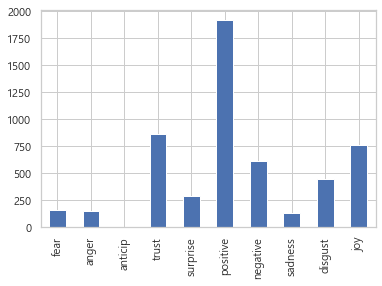

In [ ]:
df = data[data['category'] == 'White']
print("White")
df = pd.DataFrame(df)
df_sum = df.sum(numeric_only=True)
df_sum.plot.bar()

Sparkling


<AxesSubplot:>

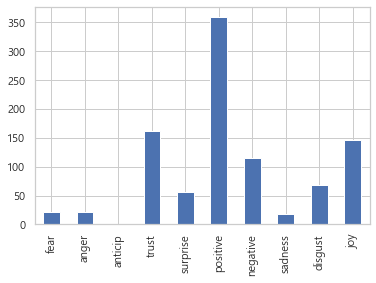

In [ ]:
df = data[data['category'] == 'Sparkling']
print("Sparkling")
df = pd.DataFrame(df)
df_sum = df.sum(numeric_only=True)
df_sum.plot.bar()

Red


<AxesSubplot:>

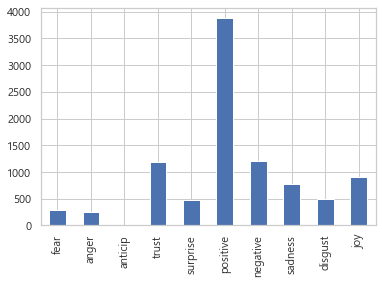

In [ ]:
df = data[data['category'] == 'Red']
print("Red")
df = pd.DataFrame(df)
df_sum = df.sum(numeric_only=True)
df_sum.plot.bar()

Dessert


<AxesSubplot:>

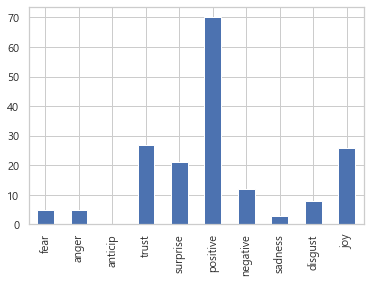

In [ ]:
df = data[data['category'] == 'Dessert']
print("Dessert")
df = pd.DataFrame(df)
df_sum = df.sum(numeric_only=True)
df_sum.plot.bar()

Rose


<AxesSubplot:>

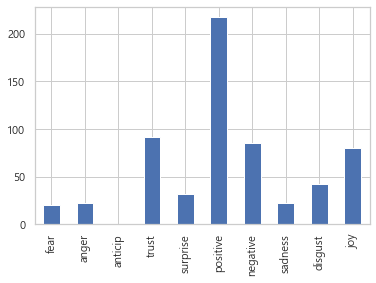

In [ ]:
df = data[data['category'] == 'Rose']
print("Rose")
df = pd.DataFrame(df)
df_sum = df.sum(numeric_only=True)
df_sum.plot.bar()

Port/Sherry


<AxesSubplot:>

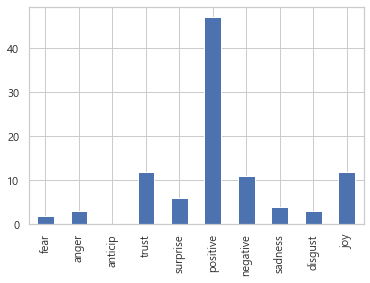

In [ ]:
df = data[data['category'] == 'Port/Sherry']
print("Port/Sherry")
df = pd.DataFrame(df)
df_sum = df.sum(numeric_only=True)
df_sum.plot.bar()

Fortified


<AxesSubplot:>

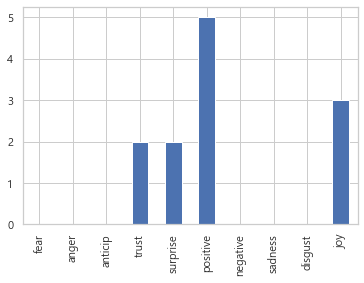

In [ ]:
df = data[data['category'] == 'Fortified']
print("Fortified")
df = pd.DataFrame(df)
df_sum = df.sum(numeric_only=True)
df_sum.plot.bar()

<AxesSubplot:xlabel='category'>

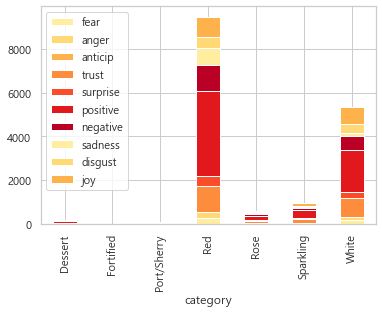

In [ ]:
# plot gby sum
palette = sns.color_palette("YlOrRd", n_colors=len(df_gby))
df_gby.plot.bar(stacked=True, color=palette)

## 4. **Conclusion**

In this study, we utilized the Wine Reviews Data to explore the diversity of wine varieties produced worldwide and their connections with the respective countries, prices, and ratings.

Our approach included analyzing specific words and patterns within wine reviews to identify keywords impacting wine quality and price. We applied social network analysis and text mining techniques to determine optimal wine varieties for a newly opened wine store to maximize consumer interest.

The analysis revealed that the United States and France are pivotal in the international wine market, depicted as large, central nodes in our network graphs. These findings suggest that wines from these countries are likely both high-quality and popular. Other countries like Spain, Italy, and Australia also demonstrated significant connections with diverse wine varieties, indicating a broad range of offerings that cater to various consumer preferences. Specific wine varieties, such as Malbec in Argentina, show strong national associations, underscoring their importance in local wine production.

Popular wines like Red Blends, White Blends, Pinot Noir, and Cabernet Sauvignon are central in many regions and exhibit high centrality scores in our network analysis. We also observed that higher ratings tend to correlate with higher prices, although this relationship is not strictly linear, indicating that various regional factors may influence wine pricing.

Out sentiment and text analysis shows that countries such as Hungry, Portugal, Austria, France, and Germany hold higher sentiment scores in their reviews. While out sentiment analysis shows US and France as key markets, it is valuble to take into account these countries for the niche market they provide.

Our emotion analysis also shows that across all wine categories, "Positive", "Trust", "Negative", and "Joy" are the emotions most detected in the reviews. This provides us with vital information for product marketing.

Future research could yield more precise insights if the origins of reviewers could be ascertained through further text mining, enhancing the understanding of global wine preferences and market dynamics.